In [1]:
# !pip install pandas
# !pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from typing import Callable, List

In [2]:
def simulate_probability(unitary: np.ndarray, bitstring:int) -> float:
  # simulates the probability of measuring bitstring when evolving from the ground state
  # according to the quantum program given unitary
  return np.abs(unitary[bitstring, 0])**2

def random_unitary(dim: int) -> np.ndarray:
  # follows the algorithm in https://arxiv.org/pdf/math-ph/0609050.pdf
  # returns a unitary of size dim x dim
  Z = np.array([np.random.normal(0, 1) + np.random.normal(0, 1) * 1j for _ in range(dim ** 2)]).reshape(dim, dim)
  Q, R = np.linalg.qr(Z)
  diag = np.diagonal(R)
  lamb = np.diag(diag) / np.absolute(diag)
  unitary = np.matmul(Q, lamb)

  # this condition asserts that the matrix is unitary
  assert np.allclose(unitary.conj().T @ unitary, np.eye(dim))

  return unitary

def quantum_sample_probability(n_qubits: int, trials: int) -> List:
  # returns the probabilities of a randomly chosen bistring outcome over "trials" number of different
  # random quantum programs on n_qubits

  dimension = 2**n_qubits
  # picks a random bitstring as labelled by the integers 1 to 2**n_qubits
  bitstring = np.random.choice(dimension)

  # keeps track of the probability of sampling the (randomly) chosen bitstring
  probs_bitstring = []
  # simulate the execution of many Haar-random quantum programs
  for _ in range(trials):
      unitary = random_unitary(dimension)
      prob = simulate_probability(unitary, bitstring)
      probs_bitstring.append(prob)

  return probs_bitstring

In [3]:
def get_bin_x(row):
    bin_x = ''
    for xi in row:
        bin_x = bin_x+str(xi)

    return bin_x

Text(0.5, 0, 'Probability')

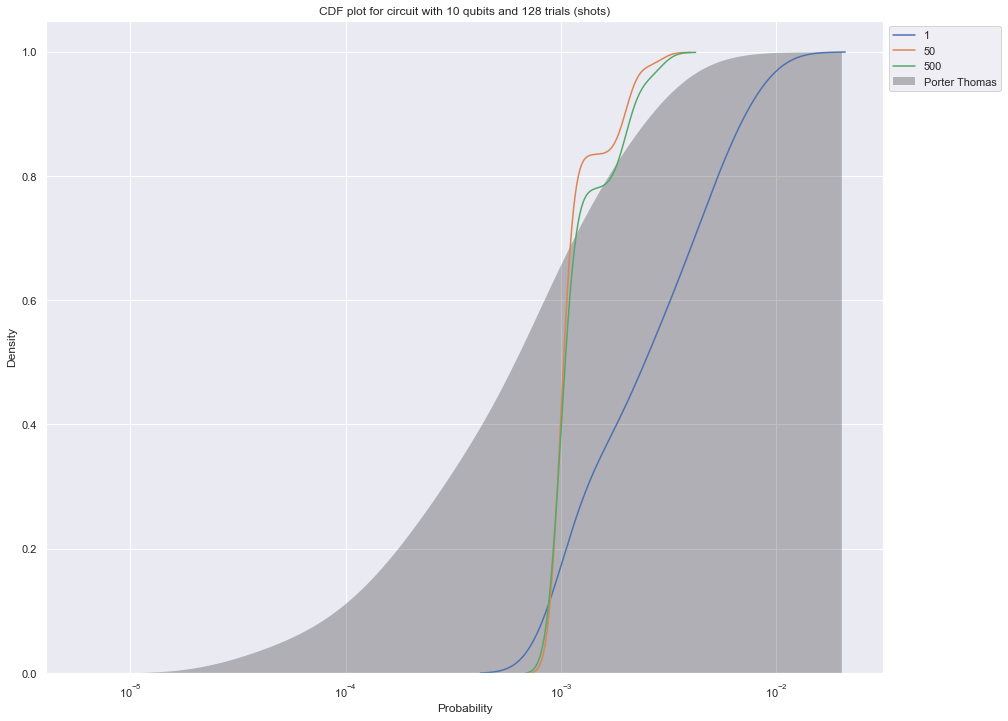

In [8]:
import glob
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# sns.set()
sns.set(rc={'figure.figsize':(15,12)})
plot_qubits = '10' #'2'
plot_depths = ['1', '5', '50', '500']
plot_trials = '128'
legend_labels = list()


for filepath in glob.iglob(r'data/task1/simulation_data/*.csv'):
    # print(filepath)
    dist_qubits = filepath.split('__')[-1].split('_')[0]
    dist_depth = filepath.split('__')[-1].split('_')[1]
    dist_trials = filepath.split('__')[-1].split('_')[2].split('.')[0]
    if ((dist_qubits==plot_qubits) and (dist_depth in plot_depths) and (plot_trials==dist_trials)):
        
        sim_df = pd.read_csv(filepath)
        sim_df['bin_x'] = sim_df.apply(get_bin_x, axis=1)
        sim_df['x'] = sim_df['bin_x'].apply(lambda x:int(x, 2))

        dist_df = pd.read_csv(filepath.replace('simulation_data', 'dist_data'))

        merge_df = pd.merge(sim_df, dist_df, how='left', on='x')

        fig = sns.kdeplot(merge_df['prob'], cumulative=True, log_scale=True, common_grid=True)
        legend_labels.append(dist_depth)
    # print()
        # break

porter_thomas = quantum_sample_probability(int(plot_qubits), int(plot_trials))
fig = sns.kdeplot(porter_thomas, cumulative=True, log_scale=True, color='black', common_grid=True, fill=True, linewidth=0)
legend_labels.append('Porter Thomas')
legends = fig.legend(legend_labels, bbox_to_anchor=(1,1))
plt.title('CDF plot for circuit with {0} qubits and {1} trials (shots)'.format(plot_qubits, plot_trials))
plt.xlabel('Probability')

Text(0.5, 0, 'Probability')

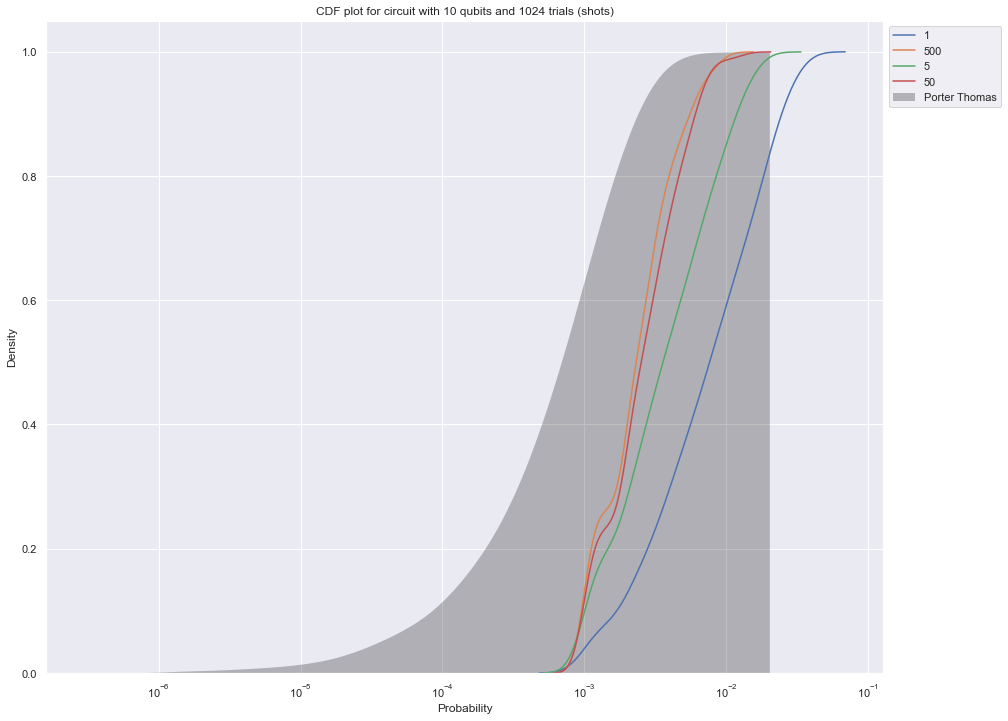

In [9]:
import glob
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15,12)})
plot_qubits = '10' #'2'
plot_depths = ['1', '5', '50', '500']
plot_trials = '1024'
legend_labels = list()


for filepath in glob.iglob(r'data/task1/simulation_data/*.csv'):
    # print(filepath)
    dist_qubits = filepath.split('__')[-1].split('_')[0]
    dist_depth = filepath.split('__')[-1].split('_')[1]
    dist_trials = filepath.split('__')[-1].split('_')[2].split('.')[0]
    if ((dist_qubits==plot_qubits) and (dist_depth in plot_depths) and (plot_trials==dist_trials)):
        
        sim_df = pd.read_csv(filepath)
        sim_df['bin_x'] = sim_df.apply(get_bin_x, axis=1)
        sim_df['x'] = sim_df['bin_x'].apply(lambda x:int(x, 2))

        dist_df = pd.read_csv(filepath.replace('simulation_data', 'dist_data'))

        merge_df = pd.merge(sim_df, dist_df, how='left', on='x')

        fig = sns.kdeplot(merge_df['prob'], cumulative=True, log_scale=True, common_grid=True)
        legend_labels.append(dist_depth)
    # print()
        # break

porter_thomas = quantum_sample_probability(int(plot_qubits), int(plot_trials))
fig = sns.kdeplot(porter_thomas, cumulative=True, log_scale=True, color='black', common_grid=True, fill=True, linewidth=0)
legend_labels.append('Porter Thomas')
legends = fig.legend(legend_labels, bbox_to_anchor=(1,1))
plt.title('CDF plot for circuit with {0} qubits and {1} trials (shots)'.format(plot_qubits, plot_trials))
plt.xlabel('Probability')